# Homework 7

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from geopy.distance import geodesic
from scipy.spatial.distance import squareform
from sklearn.cluster import KMeans

In [57]:
# load and prepare data
data = np.loadtxt('./data/cities_coordinates.txt', delimiter=',', dtype=np.str_)
X = data[:, :-1].astype(np.float_)
y = data[:, -1].astype(np.str_)

print(f"Number of samples:  {X.shape[0]}")
print(f"Number of features: {X.shape[-1]}")

Number of samples:  30
Number of features: 3


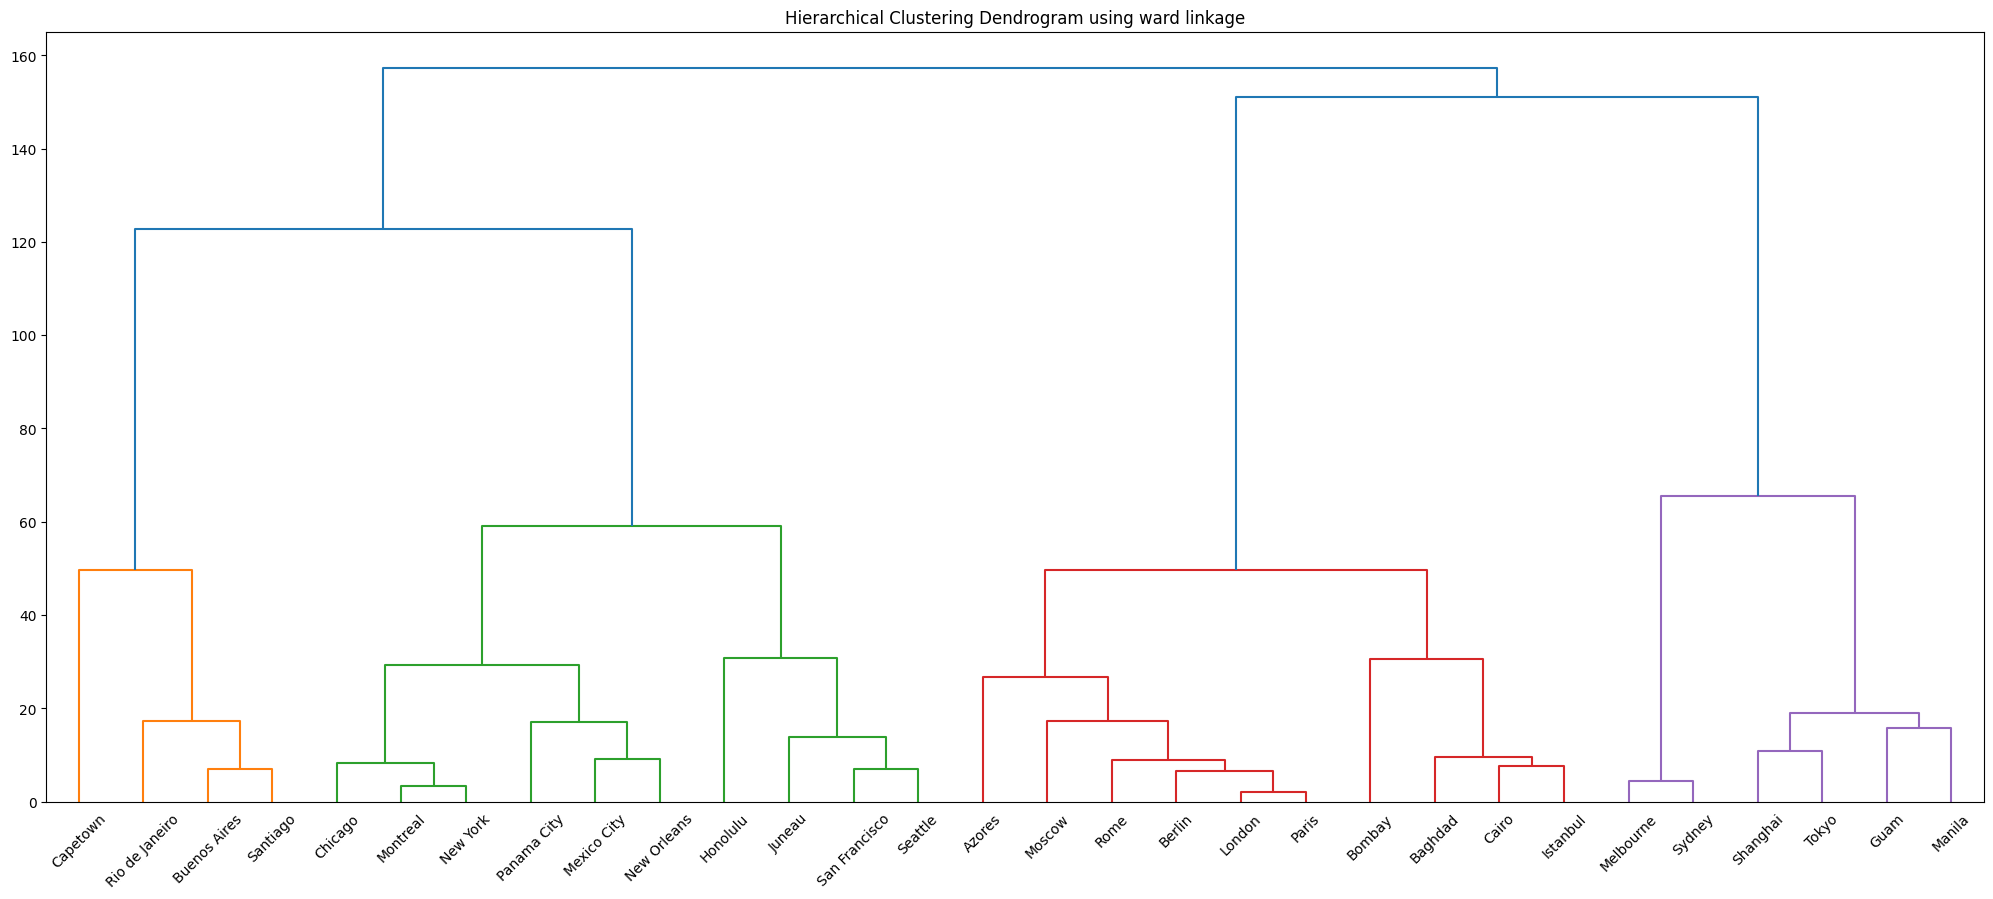

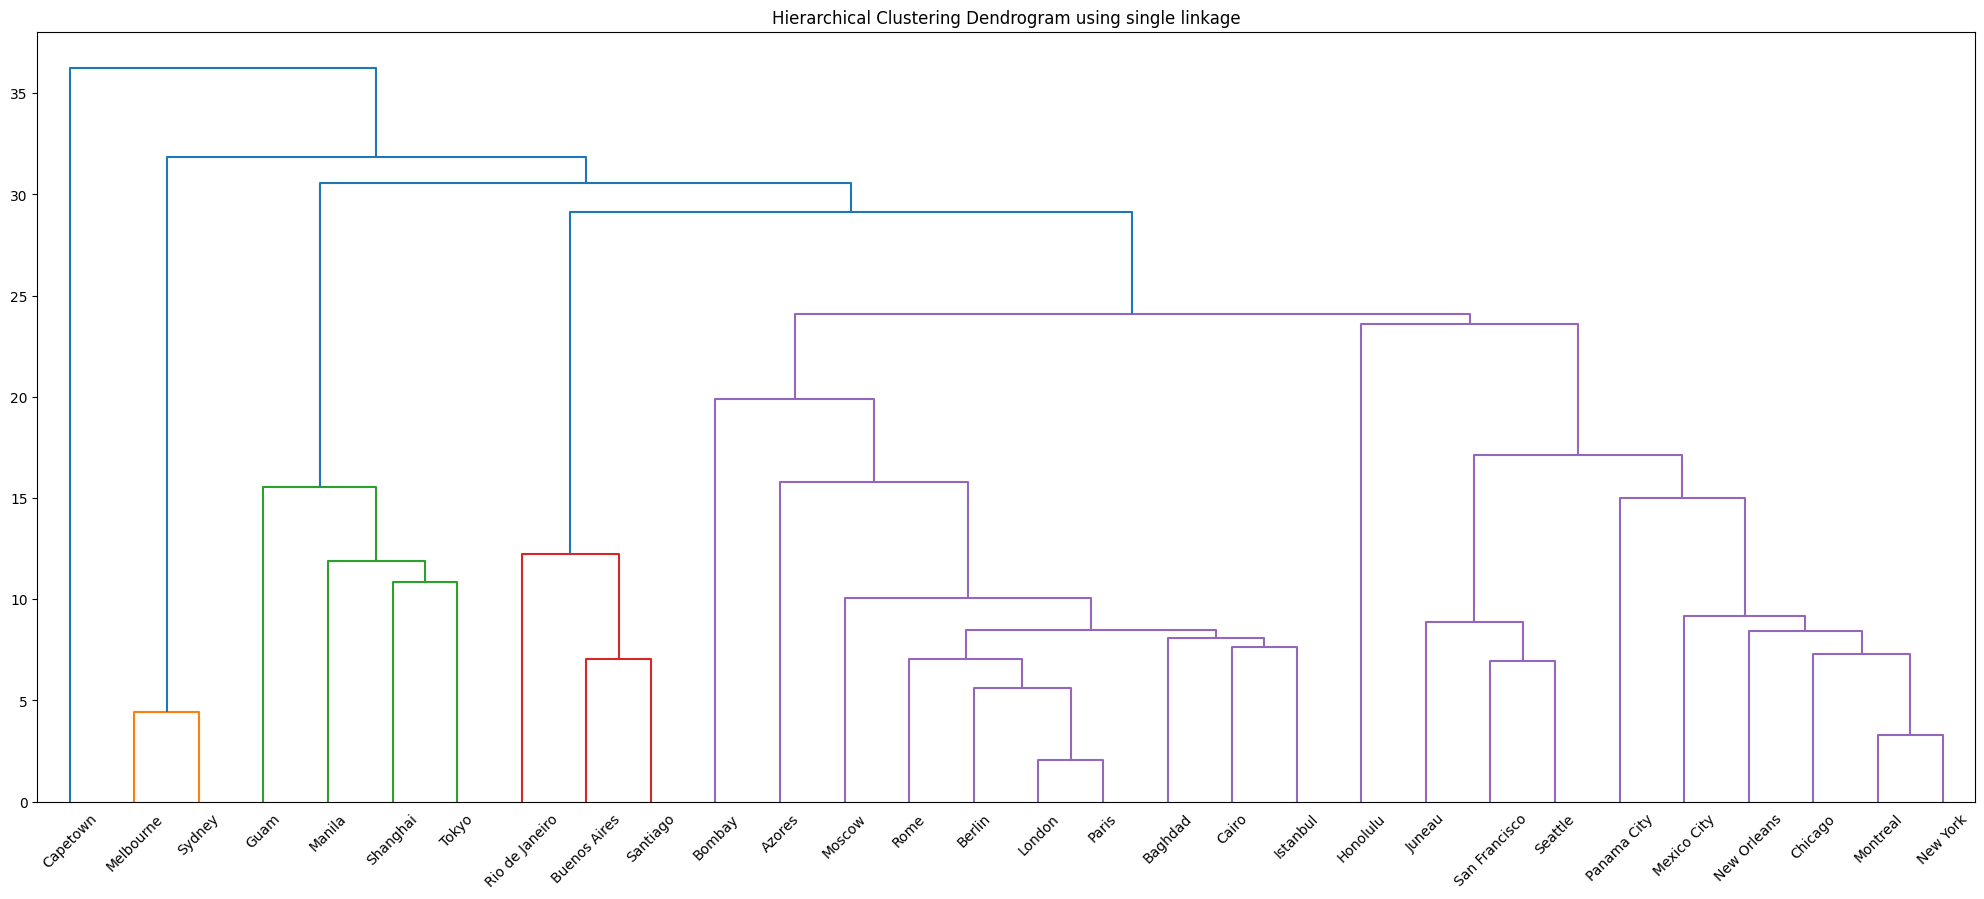

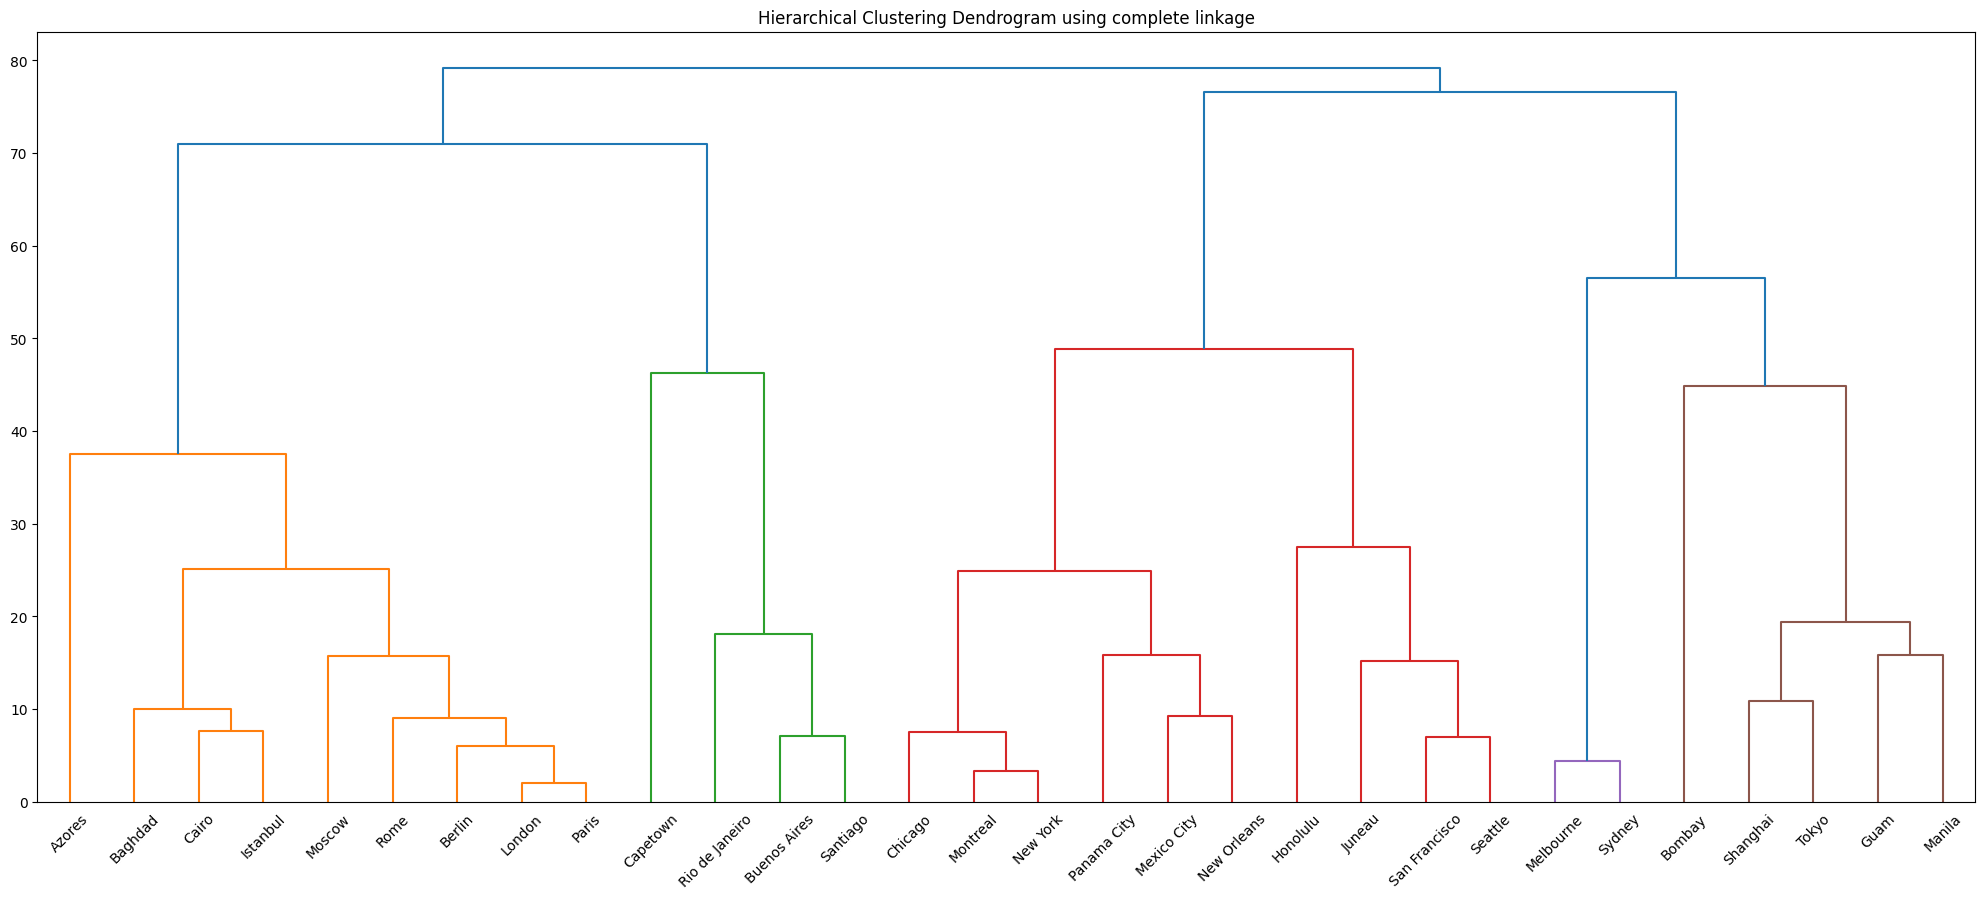

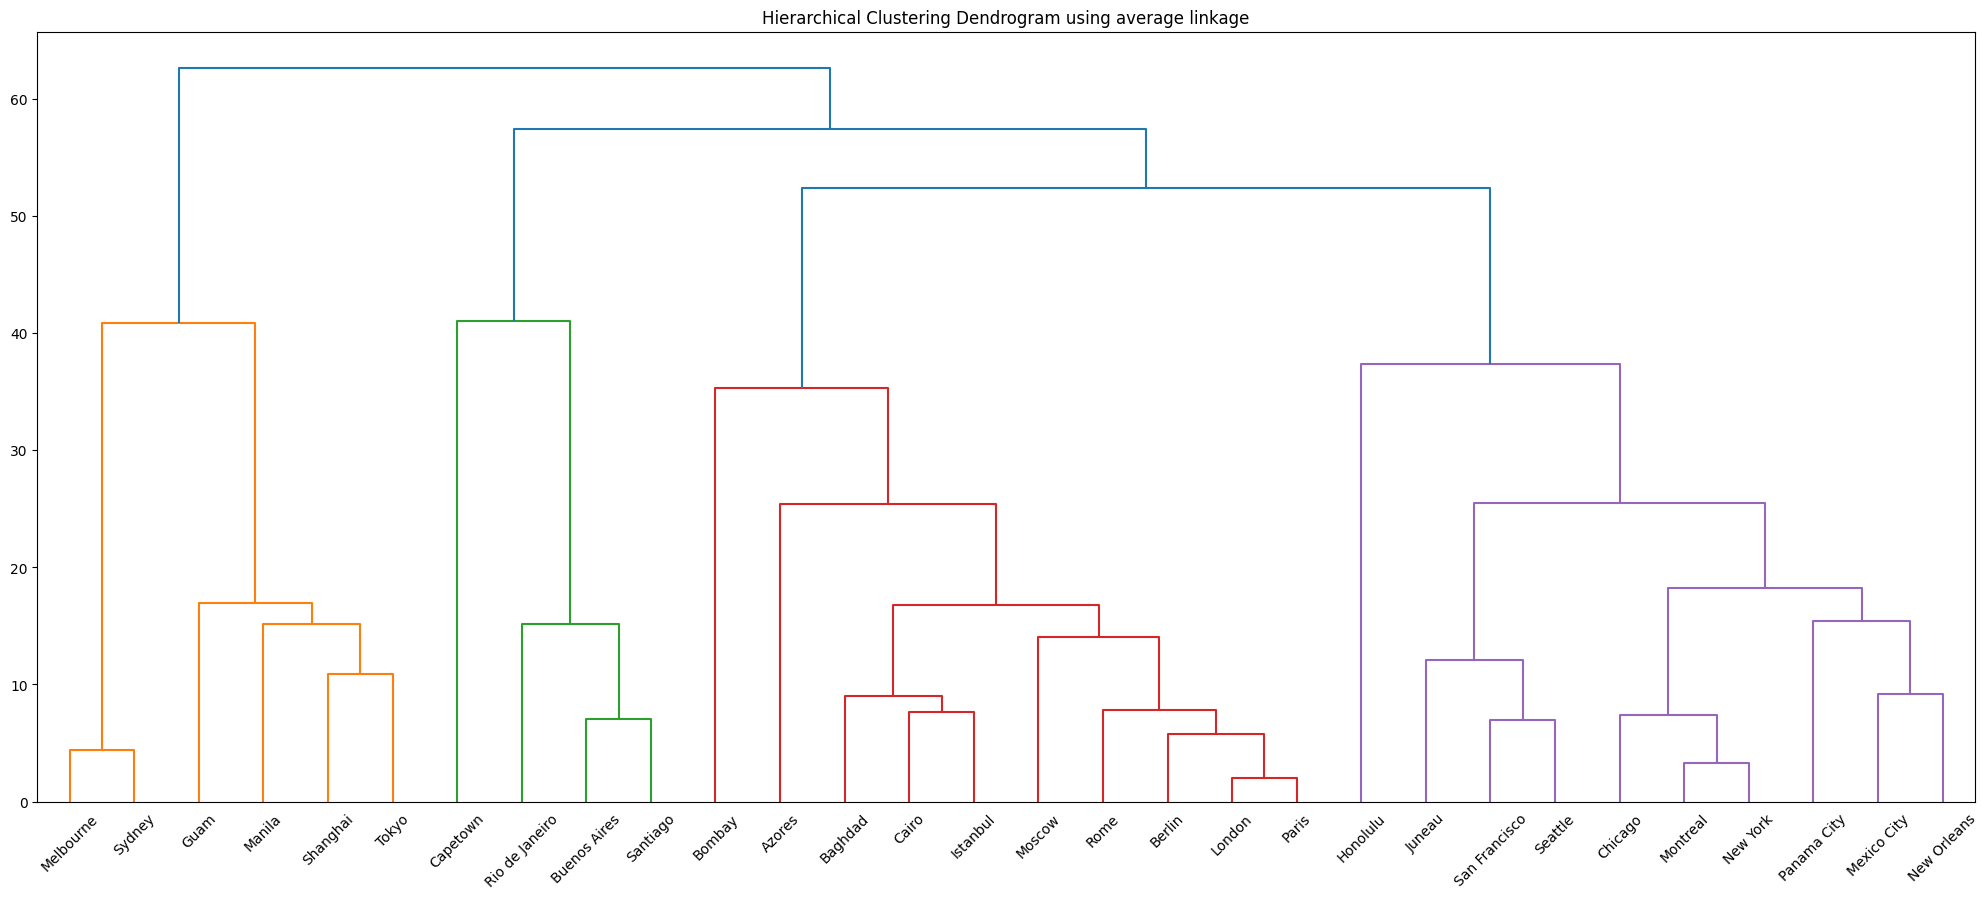

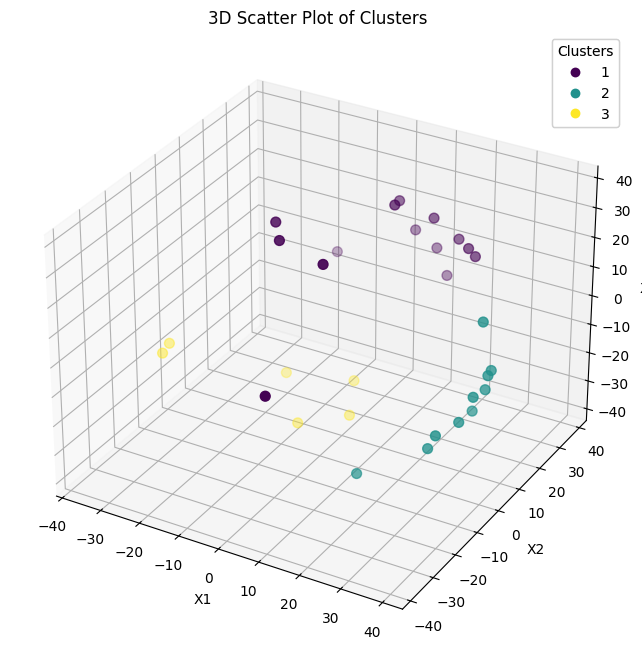

In [58]:
linkage_methods = ['ward', 'single', 'complete', 'average']

# Perform hierarchical clustering and plot dendrograms
for method in linkage_methods:
    Z = linkage(X, method)
    
    plt.figure(figsize=(25, 10))
    plt.title(f'Hierarchical Clustering Dendrogram using {method} linkage')
    dendrogram(Z, labels=y, leaf_rotation=45)
    plt.show()

# Plot the points in three-dimensional space using a scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# randomly choosen t value, i.e. number of flat clusters
Z = linkage(X, 'ward')
clusters = fcluster(Z, t=3, criterion='maxclust')

# Scatter plot
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters, cmap='viridis', s=50)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('3D Scatter Plot of Clusters')
plt.show()

In [59]:
#lat, lon
data2 = np.loadtxt('./data/cities_coordinates_lat_lon.txt', delimiter=',', dtype=np.str_)
X2 = data2[:, :-1].astype(np.float_)
y2 = data2[:, -1].astype(np.str_)

# Calculate the distance matrix
distance_matrix = np.zeros((X2.shape[0], X2.shape[0]))
for i in range(X2.shape[0]):
    for j in range(X2.shape[0]):
        distance_matrix[i, j] = geodesic(X2[i], X2[j]).kilometers

print(distance_matrix.shape)
distance_matrix = squareform(distance_matrix)
# upper triangle or whatever
# length from cairo to cape town is the same as from cape town to cairo
print(distance_matrix.shape)

(30, 30)
(435,)


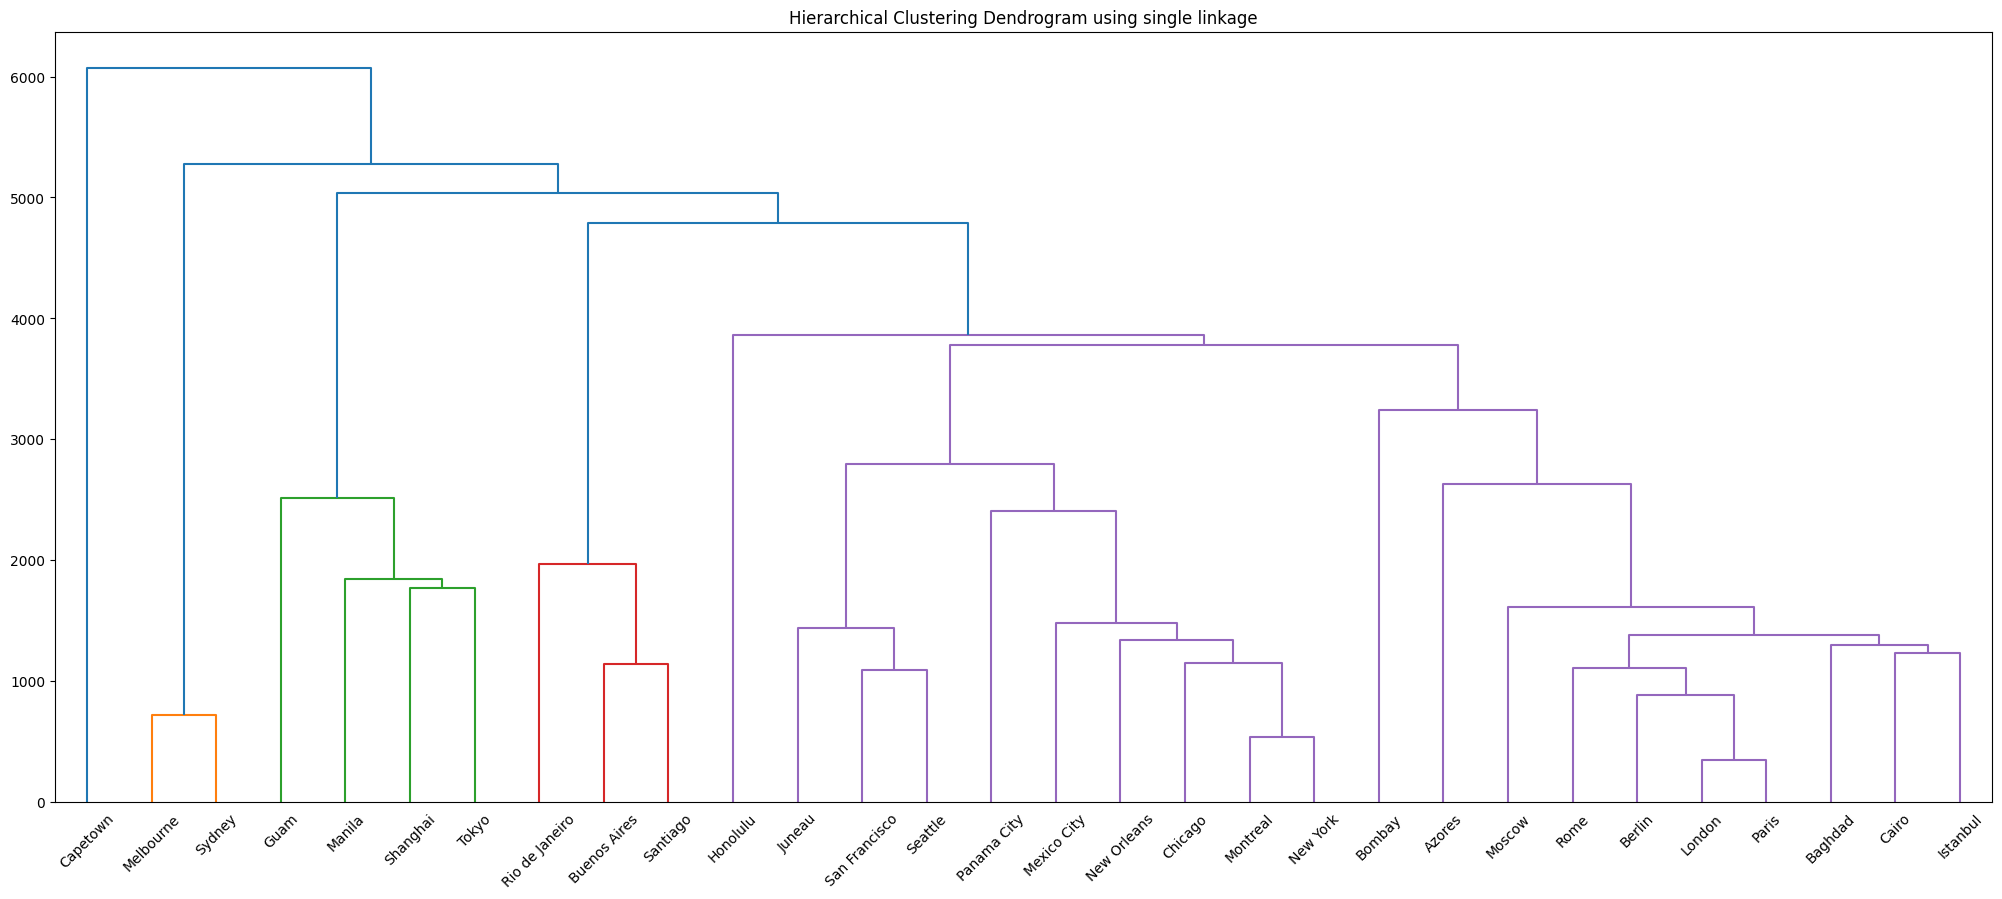

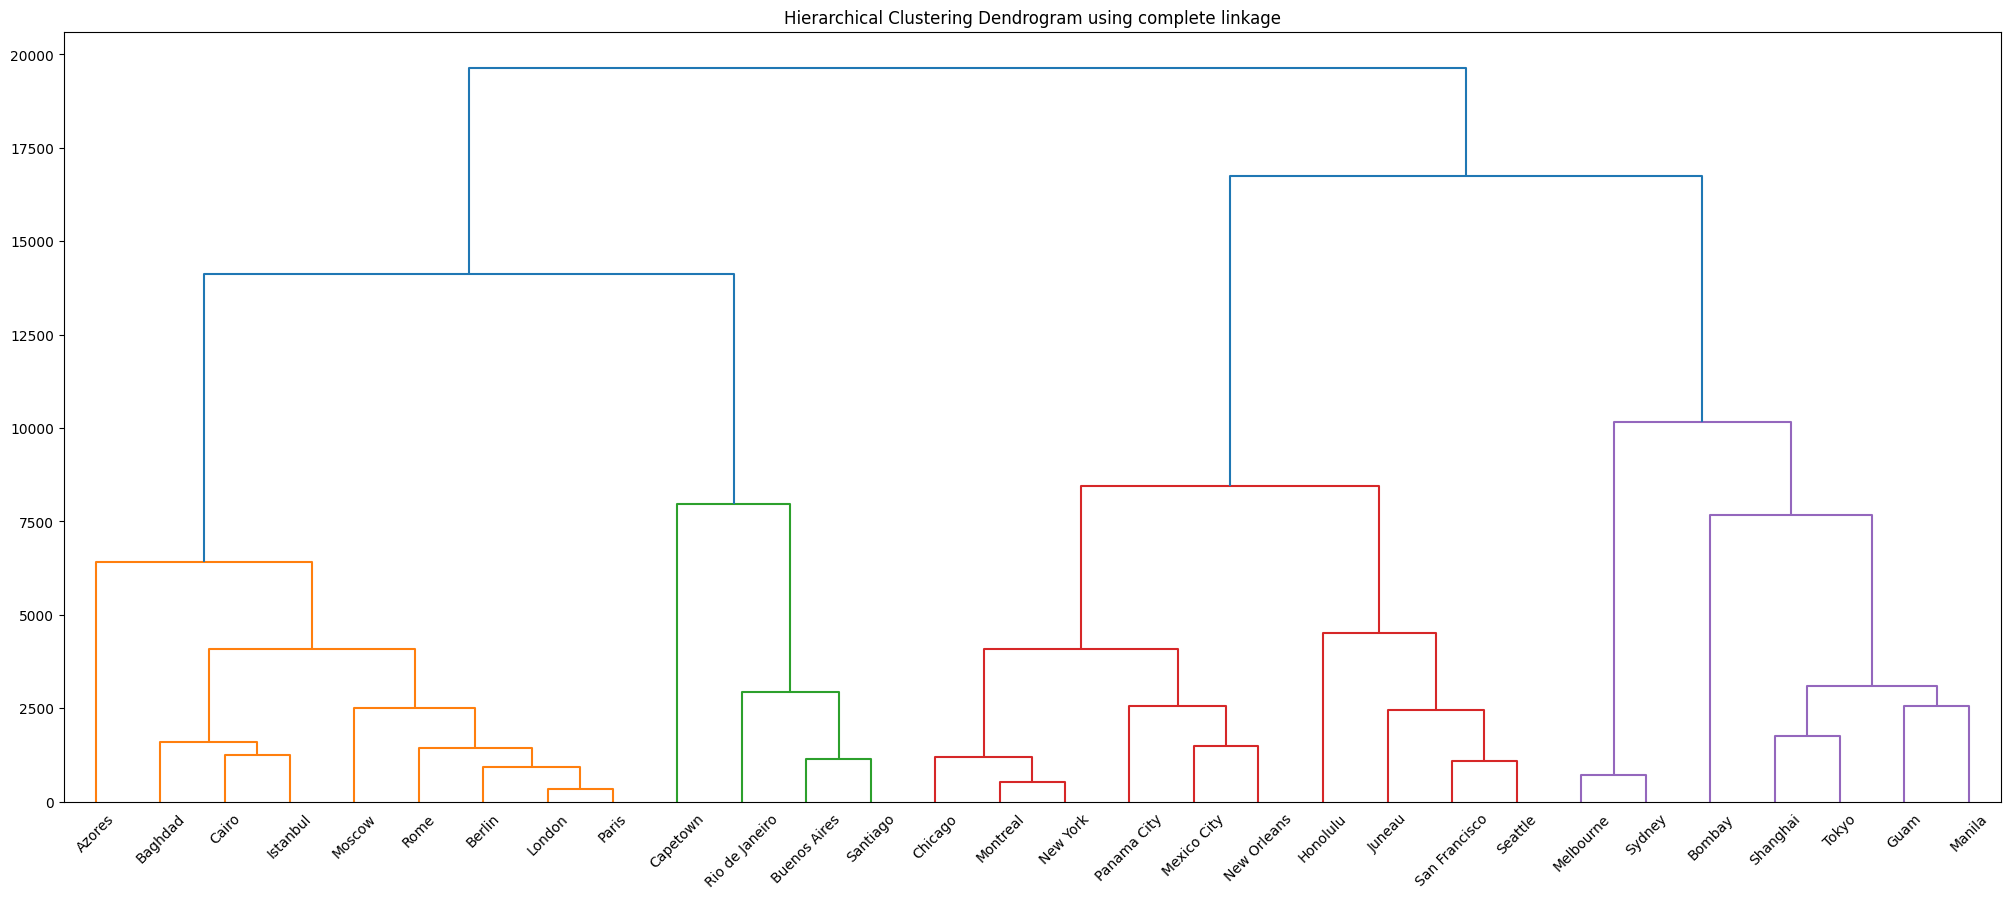

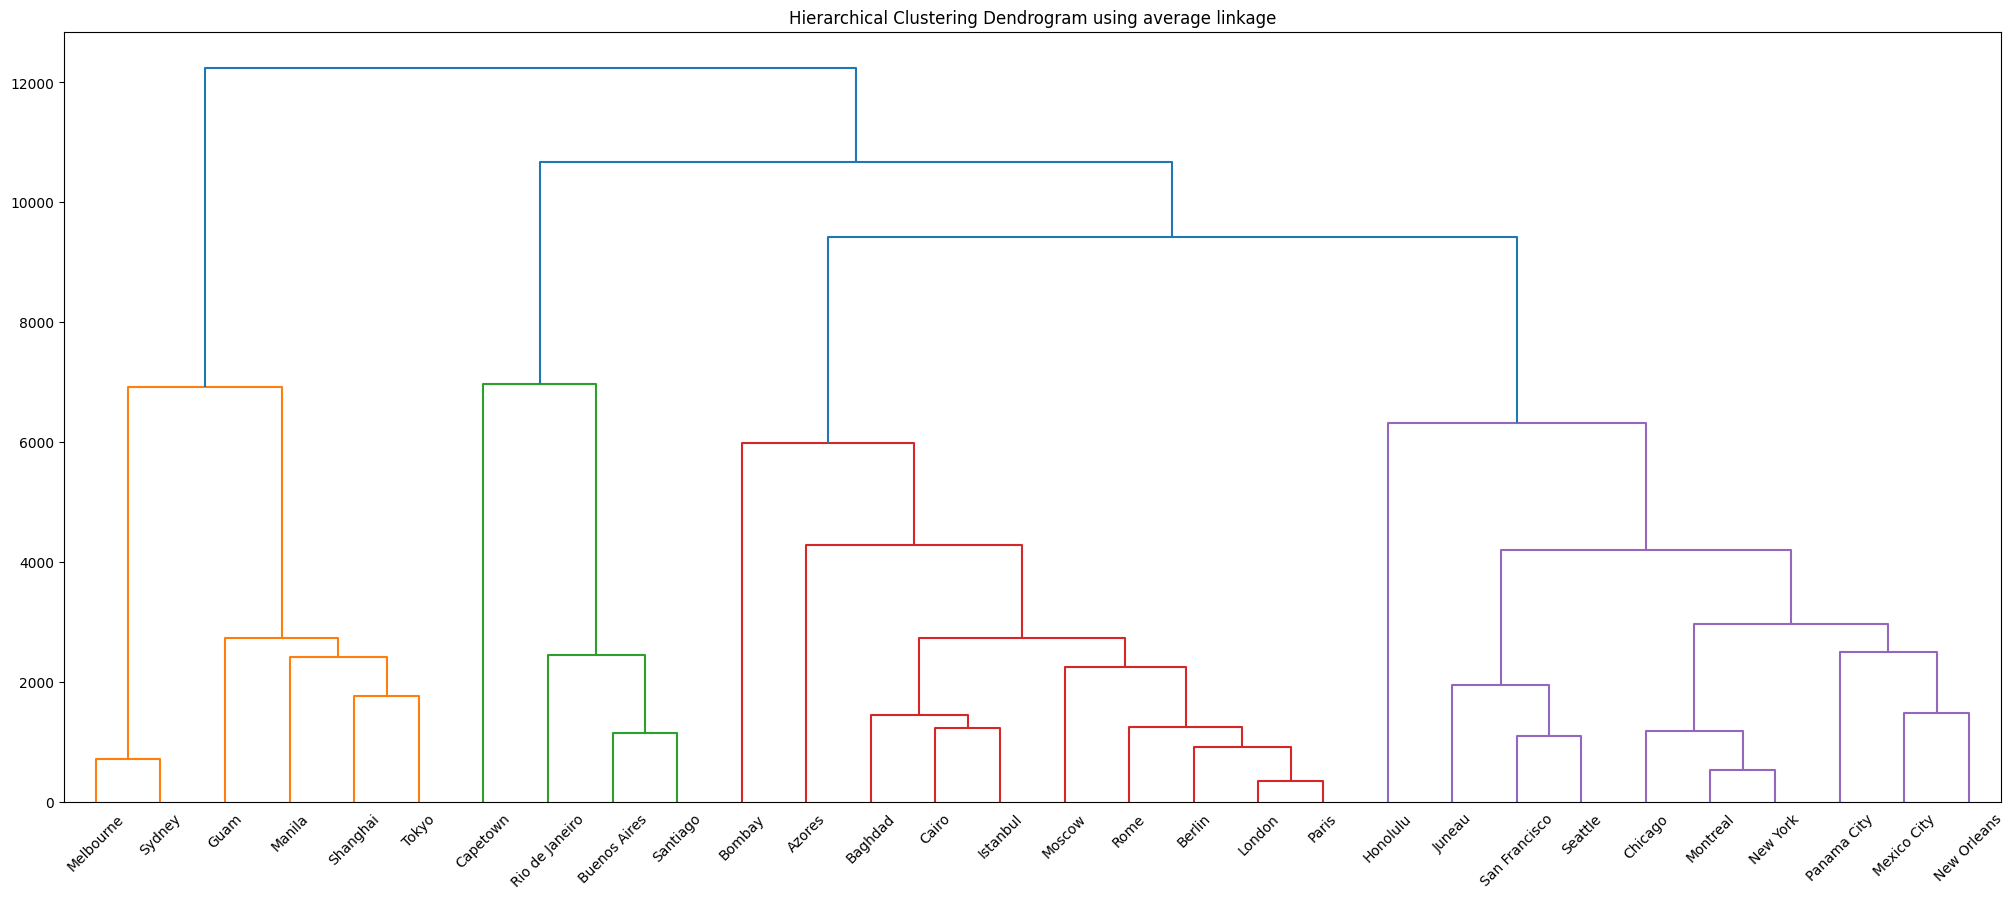

In [60]:
# Perform hierarchical clustering and plot dendrograms
linkage_methods2 = ['single', 'complete', 'average']

for method in linkage_methods2:
    Z = linkage(distance_matrix, method)
    
    plt.figure(figsize=(25, 10))
    plt.title(f'Hierarchical Clustering Dendrogram using {method} linkage')
    dendrogram(Z, labels=y2, leaf_rotation=45)
    plt.show()

# Image compression using k-means

(87600, 3)


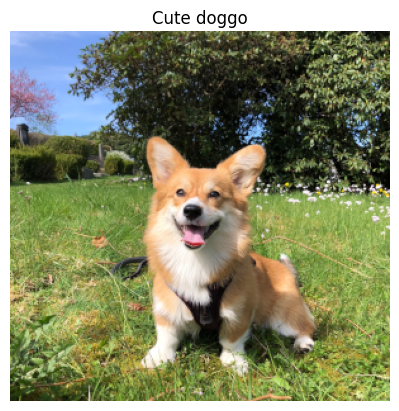

In [68]:
data3 = np.load("data/image.npy")
X3= data3.reshape(-1, 3)
print(X3.shape)
plt.imshow(data3)
plt.axis('off')
plt.title('Cute doggo')
plt.show()

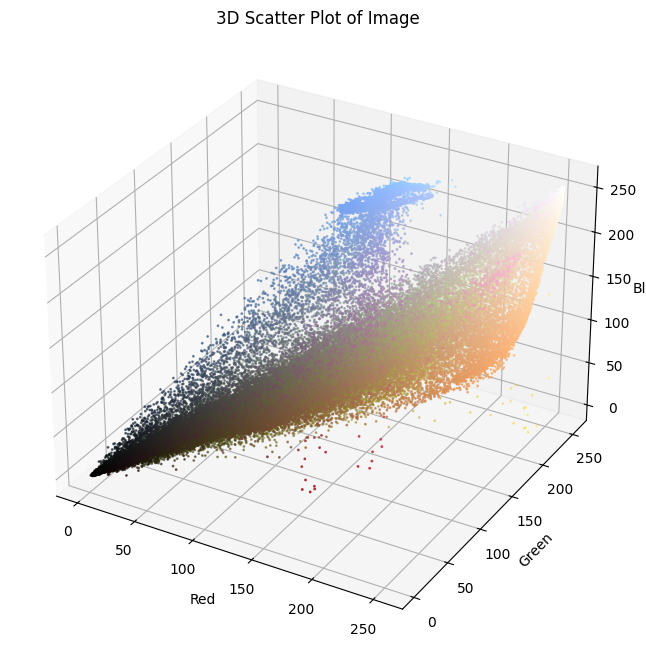

In [70]:
# 3d scatter plot of the image
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# split into rgb channels
r = X3[:, 0].flatten()
g = X3[:, 1].flatten()
b = X3[:, 2].flatten()

colors = np.stack((r, g, b), axis=-1) / 255.0
# Scatter plot
scatter = ax.scatter(r, g, b, c=colors, s=1)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.title('3D Scatter Plot of Image')
plt.show()


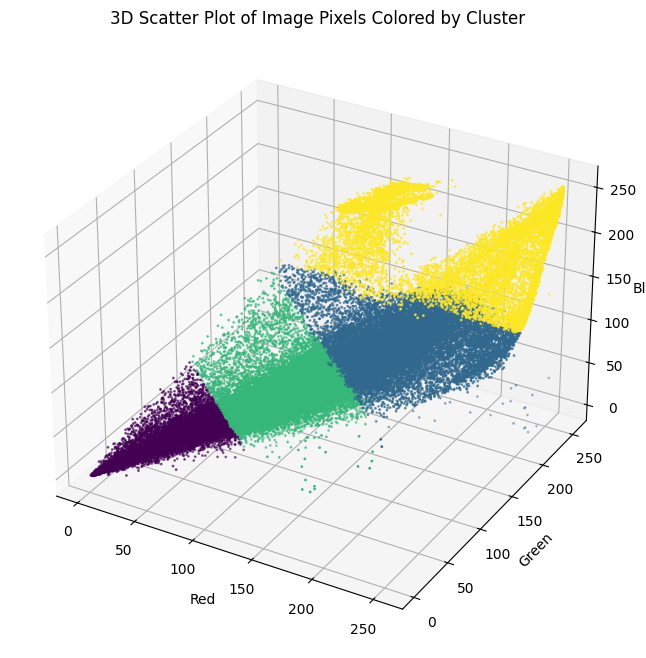

In [75]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X3)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(r, g, b, c=clusters, cmap='viridis', s=1)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.title('3D Scatter Plot of Image Pixels Colored by Cluster')
plt.show()


Space needed to store the original image: 262800 bytes


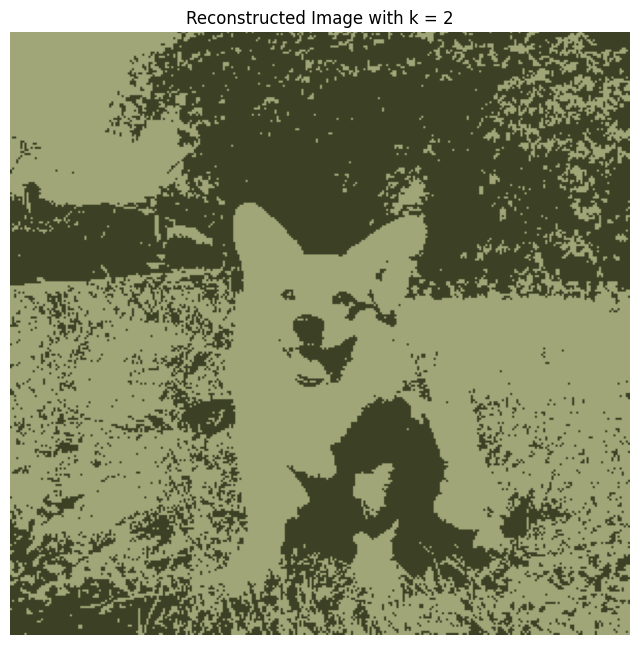

Space needed to store the reconstructed image with k = 2: 87606 bytes


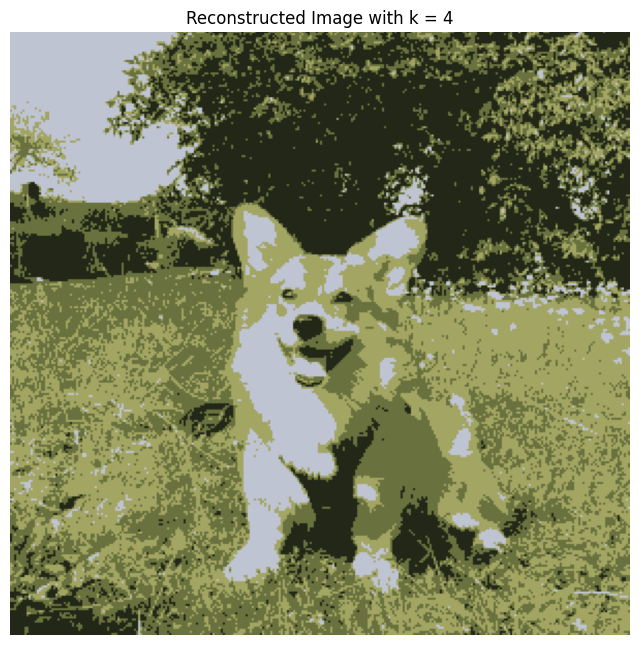

Space needed to store the reconstructed image with k = 4: 87612 bytes


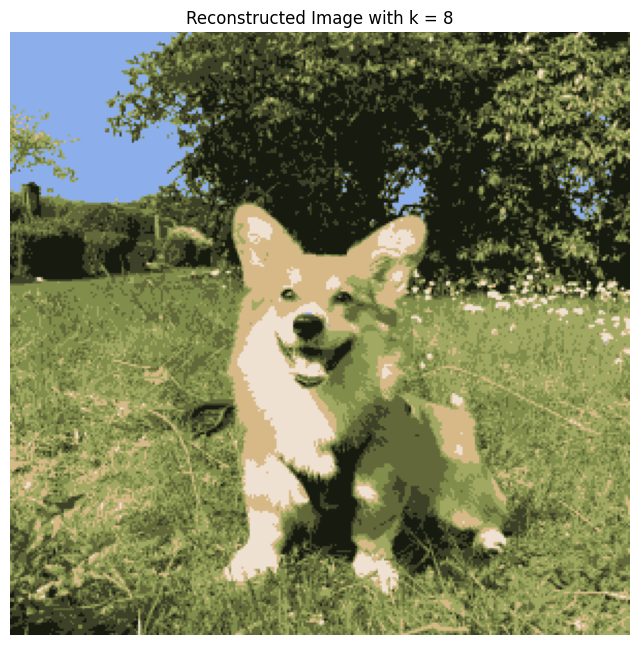

Space needed to store the reconstructed image with k = 8: 87624 bytes


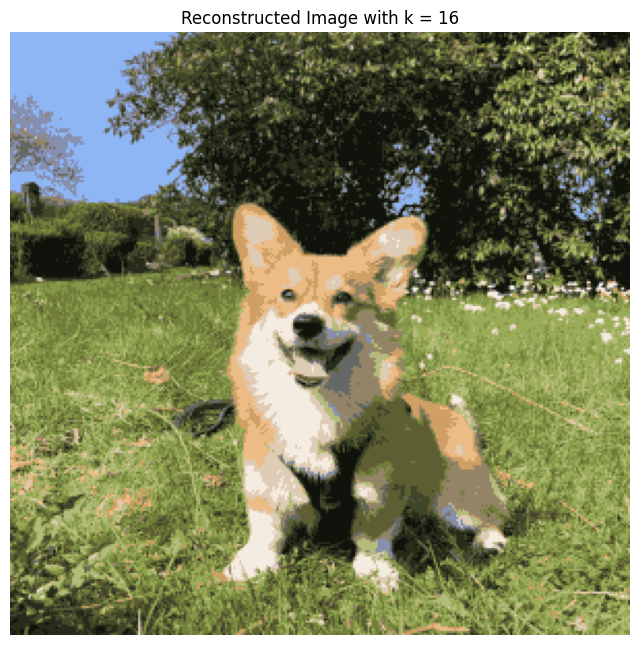

Space needed to store the reconstructed image with k = 16: 87648 bytes


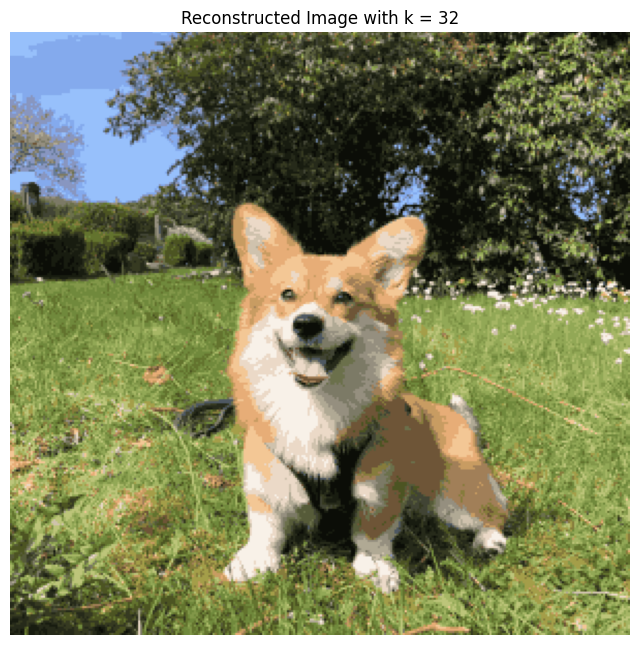

Space needed to store the reconstructed image with k = 32: 87696 bytes


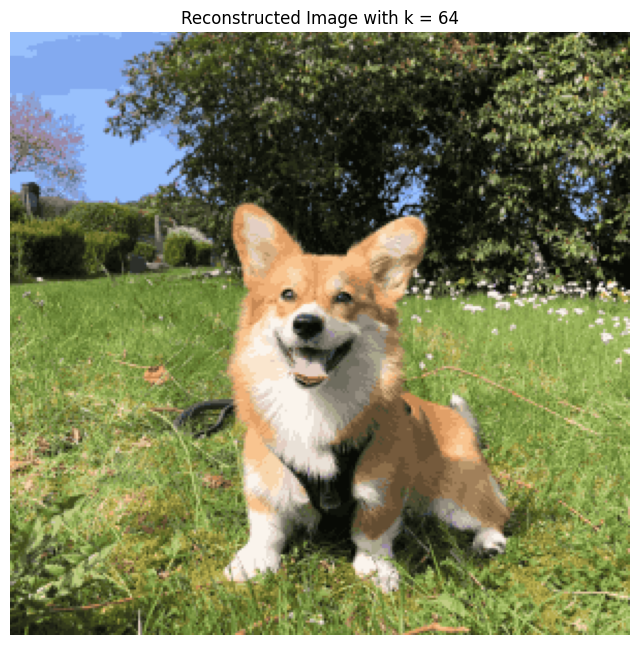

Space needed to store the reconstructed image with k = 64: 87792 bytes


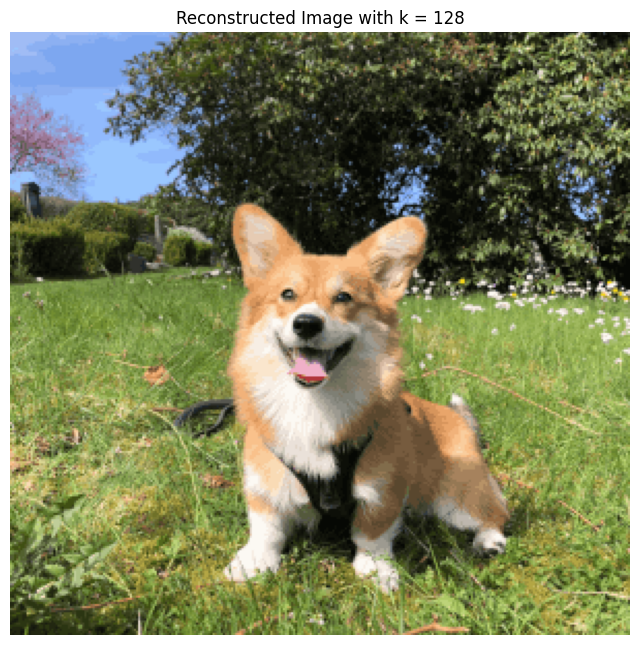

Space needed to store the reconstructed image with k = 128: 87984 bytes


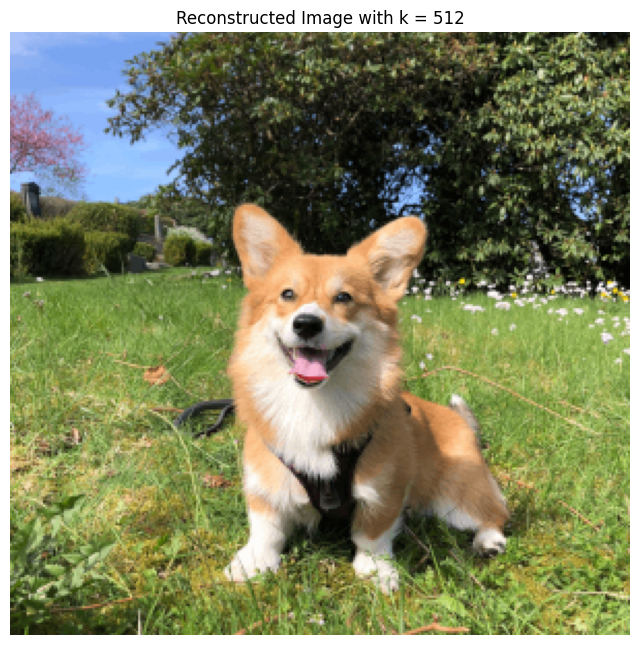

Space needed to store the reconstructed image with k = 512: 89136 bytes


In [83]:
ks = [2, 4, 8, 16, 32, 64, 128, 512]

space_origianl = X3.shape[0] * 3
print(f'Space needed to store the original image: {space_origianl} bytes')

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_
    # Recreate the image by replacing each pixel by the centroid of the cluster it belongs to
    X_reconstructed = centroids[clusters].reshape(data3.shape)
    
    # Plot the reconstructed image
    plt.figure(figsize=(8, 8))
    plt.imshow(X_reconstructed.astype(np.uint8))
    plt.title(f'Reconstructed Image with k = {k}')
    plt.axis('off')
    plt.show()

    space_reconstructed = k * 3 + len(clusters)
    print(f'Space needed to store the reconstructed image with k = {k}: {space_reconstructed} bytes')

this cuts down the storage from 262kB down to 82kB if we save the colors, and the color masks